RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          100     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51738D+03    |proj g|=  2.38010D+01

At iterate    1    f=  2.45130D+03    |proj g|=  2.10359D+01

At iterate    2    f=  2.28324D+03    |proj g|=  8.05312D+00

At iterate    3    f=  2.27155D+03    |proj g|=  9.68557D+00

At iterate    4    f=  2.26358D+03    |proj g|=  2.50157D+00

At iterate    5    f=  2.25786D+03    |proj g|=  3.91410D+00

At iterate    6    f=  2.25541D+03    |proj g|=  1.08093D+00

At iterate    7    f=  2.25425D+03    |proj g|=  1.90175D+00

At iterate    8    f=  2.25371D+03    |proj g|=  1.18325D+00

At iterate    9    f=  2.25328D+03    |proj g|=  1.46138D+00

At iterate   10    f=  2.25288D+03    |proj g|=  1.16966D+00

At iterate   11    f=  2.25271D+03    |proj g|=  1.45596D+00

At iterate   12    f=  2.25254D+03    |proj g|=  5.45924D-01

At iterate   13    f=  2.2

 This problem is unconstrained.



At iterate   19    f=  2.25204D+03    |proj g|=  4.76484D-01

At iterate   20    f=  2.25199D+03    |proj g|=  5.00222D-01

At iterate   21    f=  2.25194D+03    |proj g|=  2.11548D-01

At iterate   22    f=  2.25191D+03    |proj g|=  1.72577D-01

At iterate   23    f=  2.25187D+03    |proj g|=  3.10456D-01

At iterate   24    f=  2.25183D+03    |proj g|=  3.40242D-01

At iterate   25    f=  2.25180D+03    |proj g|=  2.18370D-01

At iterate   26    f=  2.25178D+03    |proj g|=  1.24783D-01

At iterate   27    f=  2.25177D+03    |proj g|=  1.00272D-01

At iterate   28    f=  2.25176D+03    |proj g|=  2.08320D-01

At iterate   29    f=  2.25176D+03    |proj g|=  1.12504D-01

At iterate   30    f=  2.25175D+03    |proj g|=  1.02682D-01

At iterate   31    f=  2.25174D+03    |proj g|=  1.04728D-01

At iterate   32    f=  2.25174D+03    |proj g|=  2.67437D-01

At iterate   33    f=  2.25174D+03    |proj g|=  5.51609D-02

At iterate   34    f=  2.25174D+03    |proj g|=  4.40195D-02

At iter

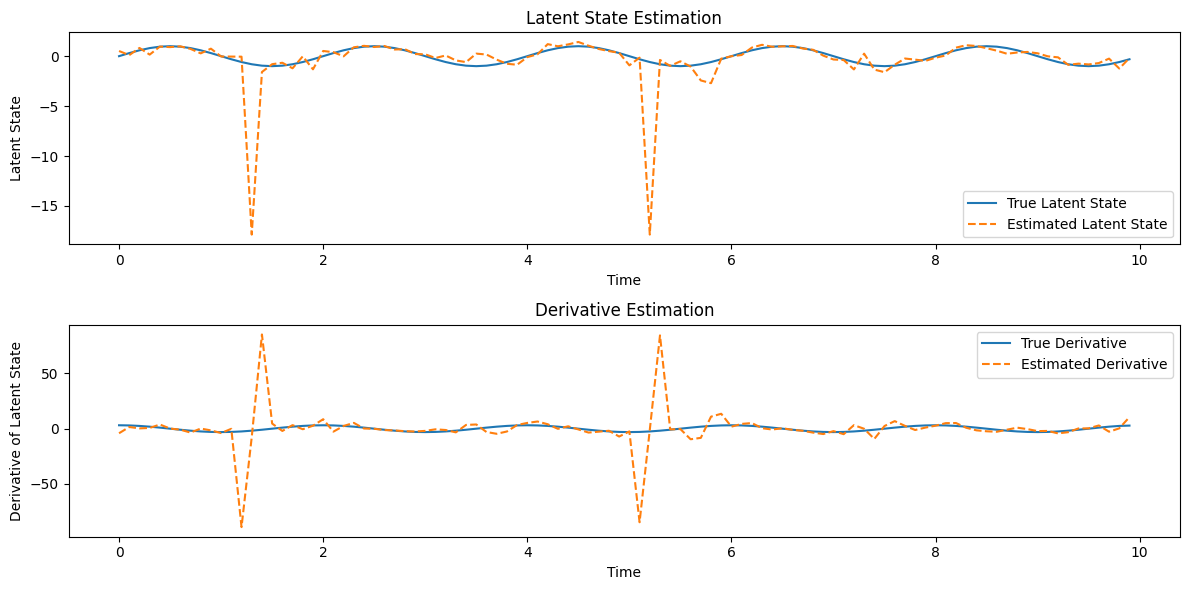

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.special  # Import for gammaln function

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
T = 100  # Number of time points
N = 50   # Number of neurons
dt = 0.1  # Time step

# Generate time vector
time = np.arange(0, T*dt, dt)

# Latent state dynamics (e.g., a simple sine wave)
def latent_dynamics(t):
    return np.sin(2 * np.pi * 0.5 * t)

# True latent state
x_true = latent_dynamics(time)

# Firing rate model parameters
a = np.random.uniform(0.5, 1.5, N)  # Neuron sensitivities
b = np.random.uniform(0.1, 0.5, N)  # Baseline firing rates

# Generate firing rates
def firing_rates(x):
    return np.exp(a[:, np.newaxis] * x + b[:, np.newaxis])

rates = firing_rates(x_true)

# Simulate Poisson spike counts
spike_counts = np.random.poisson(rates * dt)

# Estimate the derivative using Maximum Likelihood Estimation
def negative_log_likelihood(x_est, spike_counts, a, b, dt):
    """
    Computes the negative log-likelihood of the observed spike counts
    given the estimated latent state x_est.
    """
    # Ensure x_est is a 1D array
    x_est = x_est.flatten()
    
    # Compute firing rates based on estimated latent state
    rates_est = np.exp(a[:, np.newaxis] * x_est + b[:, np.newaxis])
    
    # Compute the log-likelihood
    # Using gammaln to compute log-factorial
    ll = spike_counts * np.log(rates_est * dt) - rates_est * dt - scipy.special.gammaln(spike_counts + 1)
    
    # Sum over neurons and time points
    total_ll = -np.sum(ll)
    
    return total_ll

# Initial guess for x_est (e.g., zeros)
x0 = np.zeros_like(x_true)

# Optimization to minimize the negative log-likelihood
result = minimize(
    negative_log_likelihood,
    x0,
    args=(spike_counts, a, b, dt),
    method='L-BFGS-B',
    options={'disp': True, 'maxiter': 500}
)

# Estimated latent state
x_est = result.x

# Compute the derivative of the estimated latent state
dx_dt_est = np.gradient(x_est, dt)

# Plotting the results
plt.figure(figsize=(12, 6))

# True latent state vs. Estimated latent state
plt.subplot(2, 1, 1)
plt.plot(time, x_true, label='True Latent State')
plt.plot(time, x_est, label='Estimated Latent State', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Latent State')
plt.legend()
plt.title('Latent State Estimation')

# True derivative vs. Estimated derivative
dx_dt_true = np.gradient(x_true, dt)
plt.subplot(2, 1, 2)
plt.plot(time, dx_dt_true, label='True Derivative')
plt.plot(time, dx_dt_est, label='Estimated Derivative', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Derivative of Latent State')
plt.legend()
plt.title('Derivative Estimation')

plt.tight_layout()
plt.show()


In [24]:
one = np.max((np.abs(0.2), np.abs((1/5) - 0.2)))
print(one)
two= np.max((np.abs((1/5)-0.4), np.abs((2/5) - 0.4)))
print(two)
three= np.max((np.abs((3/5)-0.7), np.abs((4/5) - 0.7)))
print(three)
four= np.max((np.abs((4/5)-0.8), np.abs((5/5) - 0.8)))
print(four)

0.2
0.2
0.10000000000000009
0.19999999999999996


In [15]:
import numpy as np

# Sample data
X = [0.2, 0.4, 0.7, 0.7, 0.8]
n = len(X)  # Sample size

# Sort the sample to compute the empirical CDF
X_sorted = sorted(X)

# Calculate the KS statistic manually
ks_statistics = []
for i in range(n):
    empirical_cdf0 = (i - 1) / n  # Empirical CDF at this point
    empirical_cdf1 = (i) / n 
    ks_stat = np.max((np.abs(X_sorted[i] - empirical_cdf0), np.abs(empirical_cdf1 - X_sorted[i])))
    ks_statistics.append(ks_stat)
    print(f"KS statistic at index {i+1}: {ks_stat}")

# The overall KS statistic is the maximum deviation
ks_statistic = max(ks_statistics)
print("KS Statistic:", ks_statistic)


KS statistic at index 1: 0.4
KS statistic at index 2: 0.4
KS statistic at index 3: 0.49999999999999994
KS statistic at index 4: 0.29999999999999993
KS statistic at index 5: 0.20000000000000007
KS Statistic: 0.49999999999999994


In [13]:
from scipy.stats import kstest

# Sample data
X = [0.2, 0.4, 0.7, 0.7, 0.8]

# Perform the KS test against a uniform distribution on (0, 1)
ks_statistic, p_value = kstest(X, 'uniform')

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.29999999999999993
P-value: 0.6640000000000001


In [16]:
import numpy as np

# Sample data
X = [0.2, 0.4, 0.7, 0.7, 0.8]
n = len(X)  # Sample size

# Sort the sample to compute the empirical CDF
X_sorted = sorted(X)

# Calculate the KS statistic manually
ks_statistics = []
for i in range(n):
    # Empirical CDF values just before and just after each point
    empirical_cdf0 = i / n  # Empirical CDF before the current point
    empirical_cdf1 = (i + 1) / n  # Empirical CDF after the current point
    ks_stat = max(np.abs(X_sorted[i] - empirical_cdf0), np.abs(empirical_cdf1 - X_sorted[i]))
    ks_statistics.append(ks_stat)
    print(f"KS statistic at index {i+1}: {ks_stat}")

# The overall KS statistic is the maximum deviation
ks_statistic = max(ks_statistics)
print("KS Statistic:", ks_statistic)


KS statistic at index 1: 0.2
KS statistic at index 2: 0.2
KS statistic at index 3: 0.29999999999999993
KS statistic at index 4: 0.10000000000000009
KS statistic at index 5: 0.19999999999999996
KS Statistic: 0.29999999999999993


In [23]:
from scipy.stats import kstest

# Sample data
X = [0.01,0.1,0.2,0.28,0.8]

# Perform the KS test against a uniform distribution on (0, 1)
ks_statistic, p_value = kstest(X, 'norm')

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

print(np.mean(X))
print(np.std(X, ddof=1))

KS Statistic: 0.5039893563146316
P-value: 0.10680516548350072
0.278
0.30906310035330975


In [25]:
import numpy as np
from scipy.stats import norm

# Sample data
X = [0.2, 0.4, 0.7, 0.7, 0.8]
n = len(X)

# Estimate parameters of the normal distribution from the sample
mean_X = np.mean(X)
std_X = np.std(X, ddof=1)  # Use sample standard deviation

# Sort the sample to compute the empirical CDF
X_sorted = sorted(X)

# Calculate the Kolmogorov-Lilliefors statistic
kl_statistics = []
for i in range(n):
    empirical_cdf0 = i / n  # Empirical CDF just before this point
    empirical_cdf1 = (i + 1) / n  # Empirical CDF just after this point
    
    # CDF of the fitted normal distribution at this point
    fitted_cdf = norm.cdf(X_sorted[i], loc=mean_X, scale=std_X)
    
    # Calculate the maximum difference for each point
    kl_stat = max(abs(fitted_cdf - empirical_cdf0), abs(empirical_cdf1 - fitted_cdf))
    kl_statistics.append(kl_stat)
    print(f"Kolmogorov-Lilliefors statistic at index {i+1}: {kl_stat}")

# The overall Kolmogorov-Lilliefors statistic is the maximum deviation
kl_statistic = max(kl_statistics)
print("Kolmogorov-Lilliefors Statistic:", kl_statistic)


Kolmogorov-Lilliefors statistic at index 1: 0.12425300379788995
Kolmogorov-Lilliefors statistic at index 2: 0.1380858277375715
Kolmogorov-Lilliefors statistic at index 3: 0.3115004188756296
Kolmogorov-Lilliefors statistic at index 4: 0.11150041887562967
Kolmogorov-Lilliefors statistic at index 5: 0.16948992198956092
Kolmogorov-Lilliefors Statistic: 0.3115004188756296


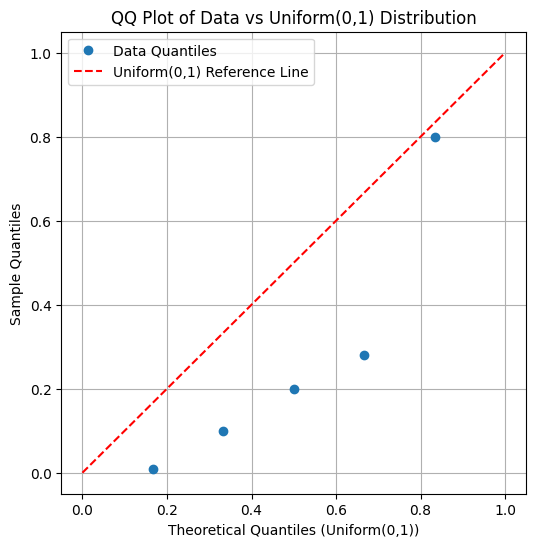

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample data
X = [0.28,0.2,0.01,0.8,0.1]
n = len(X)

# Sort the data
X_sorted = np.sort(X)

# Generate theoretical quantiles for the uniform distribution
# Use the uniform quantiles corresponding to the ranks of the sample data
theoretical_quantiles = np.linspace(0, 1, n + 2)[1:-1]  # Exclude 0 and 1 to avoid extreme values

# Create the QQ plot
plt.figure(figsize=(6, 6))
plt.plot(theoretical_quantiles, X_sorted, 'o', label='Data Quantiles')
plt.plot([0, 1], [0, 1], 'r--', label='Uniform(0,1) Reference Line')
plt.xlabel('Theoretical Quantiles (Uniform(0,1))')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot of Data vs Uniform(0,1) Distribution')
plt.legend()
plt.grid(True)
plt.show()


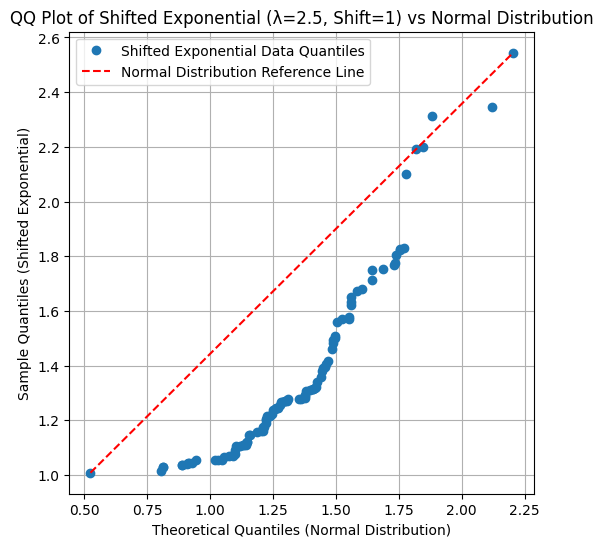

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
lambda_param = 2.5
n = 100  # Number of data points

# Generate data from a shifted exponential distribution
exp_data = np.random.exponential(1 / lambda_param, n) + 1  # Shift by +1

# Sort the data for the QQ plot
exp_data_sorted = np.sort(exp_data)

# Generate theoretical quantiles from a standard normal distribution
normal_quantiles = np.sort(np.random.normal(loc=np.mean(exp_data), scale=np.std(exp_data), size=n))

# Create the QQ plot
plt.figure(figsize=(6, 6))
plt.plot(normal_quantiles, exp_data_sorted, 'o', label='Shifted Exponential Data Quantiles')
plt.plot([min(normal_quantiles), max(normal_quantiles)],
         [min(exp_data_sorted), max(exp_data_sorted)], 'r--', label='Normal Distribution Reference Line')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Shifted Exponential)')
plt.title('QQ Plot of Shifted Exponential (λ=2.5, Shift=1) vs Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()
